<a href="https://colab.research.google.com/github/woodstone10/fundamental-ml-dl-study/blob/main/%EC%88%98%EC%A0%95%EB%90%9C_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 합성곱 구현 프로젝트 과제

### 필요한 모듈 임포트

In [1]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

### cifar10 이미지 로딩

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

170500096/170498071 [==============================] - 2s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


### 이미지 시각화

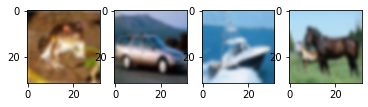

In [3]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

### 이미지 정규화 ( 스케일링 )

In [4]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


### 모델 구현 및 훈련 - 재구현 필요

In [ ]:
num_classes = 10     
batchSize = 512                   #-- Training Batch Size
num_epochs = 20                   #-- Number of epochs for training   
learningRate= 0.01                #-- Learning rate for the network
img_rows = 32                     #-- input image dimensions
img_cols = 32 
img_ch=3

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_rows, img_cols, img_ch)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

print(X_train.shape)
print(y_train.shape)

model.fit(X_train, y_train, batch_size=batchSize, epochs=num_epochs)

(50000, 32, 32, 3)
(50000, 1)
Epoch 1/20
98/98 [==============================] - 36s 63ms/step - loss: 1.8719 - accuracy: 0.3058
Epoch 2/20
98/98 [==============================] - 6s 56ms/step - loss: 1.2074 - accuracy: 0.5646
Epoch 3/20
98/98 [==============================] - 6s 57ms/step - loss: 0.9467 - accuracy: 0.6642
Epoch 4/20
98/98 [==============================] - 6s 57ms/step - loss: 0.7830 - accuracy: 0.7280
Epoch 5/20
98/98 [==============================] - 6s 57ms/step - loss: 0.6319 - accuracy: 0.7790
Epoch 6/20
98/98 [==============================] - 6s 57ms/step - loss: 0.5229 - accuracy: 0.8177
Epoch 7/20
98/98 [==============================] - 6s 58ms/step - loss: 0.4174 - accuracy: 0.8571
Epoch 8/20
98/98 [==============================] - 6s 57ms/step - loss: 0.3320 - accuracy: 0.8877
Epoch 9/20
98/98 [==============================] - 6s 57ms/step - loss: 0.2572 - accuracy: 0.9134
Epoch 10/20
98/98 [==============================] - 6s 57ms/step - loss: 0.17

In [ ]:
result = model.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 2s 5ms/step - loss: 1.5749 - accuracy: 0.7512
[1.5748579502105713, 0.7512000203132629]


## 모델 재구현 (Keras High-level API)
- low level 구현은 복잡해서 Keras high-level API로 재구현 하였습니다.

In [7]:
num_classes = 10     
batchSize = 512                   #-- Training Batch Size
num_epochs = 20                   #-- Number of epochs for training   
learningRate= 0.01                #-- Learning rate for the network
img_rows = 32                     #-- input image dimensions
img_cols = 32 
img_ch=3

model = Sequential([
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu, padding='same', input_shape=(img_rows, img_cols, img_ch)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),  
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)        

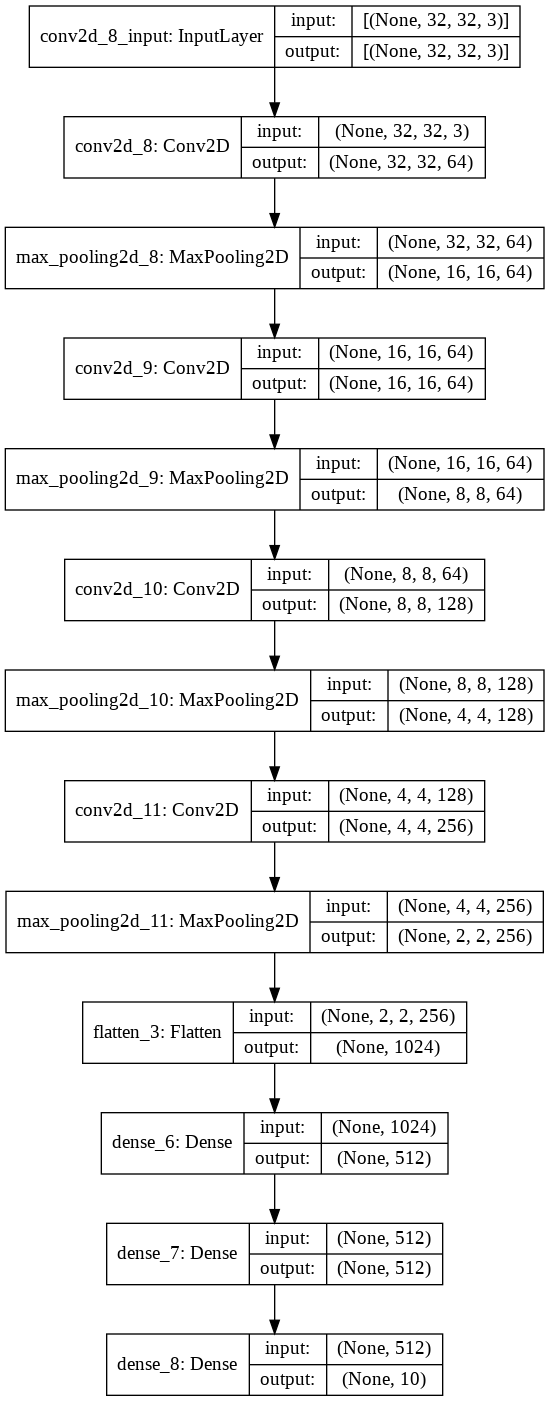

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(X_train.shape)
print(y_train.shape)

history = model.fit(X_train, y_train, 
          #validation_split=0.3,
          epochs=num_epochs, 
          batch_size=batchSize,)

(50000, 32, 32, 3)
(50000, 1)
Epoch 1/20
98/98 [==============================] - 4s 37ms/step - loss: 0.5049 - accuracy: 0.8612
Epoch 2/20
98/98 [==============================] - 3s 30ms/step - loss: 0.2100 - accuracy: 0.9377
Epoch 3/20
98/98 [==============================] - 3s 30ms/step - loss: 0.1340 - accuracy: 0.9581
Epoch 4/20
98/98 [==============================] - 3s 30ms/step - loss: 0.0897 - accuracy: 0.9716
Epoch 5/20
98/98 [==============================] - 3s 30ms/step - loss: 0.0915 - accuracy: 0.9697
Epoch 6/20
98/98 [==============================] - 3s 31ms/step - loss: 0.0650 - accuracy: 0.9772
Epoch 7/20
98/98 [==============================] - 3s 30ms/step - loss: 0.0696 - accuracy: 0.9761
Epoch 8/20
98/98 [==============================] - 3s 31ms/step - loss: 0.0598 - accuracy: 0.9792
Epoch 9/20
98/98 [==============================] - 3s 31ms/step - loss: 0.0567 - accuracy: 0.9799
Epoch 10/20
98/98 [==============================] - 3s 30ms/step - loss: 0.065

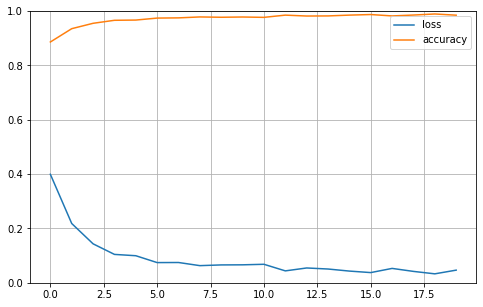

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
result = model.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 1.7366 - accuracy: 0.7386
[1.7365648746490479, 0.7386000156402588]
